In [44]:
import csv
import matplotlib.pyplot as plt

In [45]:
def Initialize(rownumber):
    f = open("C:/Users/lucas/utrecht.csv", "r")
    with f as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        AmmountYear = []
        AmmountMonth = []
        Ammount = []


        lineNumber = 0
        for row in csv_reader:
            if lineNumber == 1:
                try:
                    Ammount.append(int(row[rownumber]))
                except:
                    Ammount.append(int(row[rownumber]))
            else:
                name = row[rownumber]
                if rownumber < 10:
                    name = name[:-2]
                if rownumber > 10:
                    name = name[:-3]
                lineNumber = 1

        for value in Ammount:
            if ((lineNumber - 12) % 13 == 0) or lineNumber == 12:
                AmmountYear.append(Ammount[lineNumber])
            lineNumber += 1

        lineNumber = 0
        for value in Ammount:
            if not (((lineNumber - 12) % 13 == 0) or lineNumber == 12):
                AmmountMonth.append(value)

            lineNumber += 1
        return AmmountYear,AmmountMonth,name


In [46]:
def Average(AmmountYear,AmmountMonth,name):
    total = 0

    for value in AmmountYear:
        total += value
    yearAverage = total / len(AmmountYear)

    # print("Average Living babies born per year " + str(yearAverage))
    print(name + " Average per year " + str(round(yearAverage)))
    # print("Average Living babies born month year " + str(yearAverage / 12))
    print(name + " Average per month " + str(round(yearAverage / 12)))
    
    return yearAverage


In [47]:
def Mediaan(AmmountYear,AmmountMonth,name):
    def calcMediaan(listToGetMediaan):
        listToGetMediaan = sorted(listToGetMediaan)
        indexMediaan = len(listToGetMediaan) / 2
        if round(indexMediaan) == indexMediaan:
            indexMediaan = round(indexMediaan)

        if type(indexMediaan) == float:

            if round(indexMediaan) % 2 == 0:
                lowerIndex = round(indexMediaan)
                higerIndex = round(indexMediaan) + 1
            else:
                lowerIndex = round(indexMediaan) - 1
                higerIndex = round(indexMediaan)

            mediaan = (listToGetMediaan[lowerIndex] + listToGetMediaan[higerIndex]) / 2

        else:
            mediaan = listToGetMediaan[indexMediaan]
        return mediaan

    print(name + " Mediaan per year " + str(calcMediaan(AmmountYear)))
    print(name + " Mediaan per month " + str(calcMediaan(AmmountMonth)))

In [48]:
def Mode(AmmountYear,AmmountMonth,name):
    freqDict = {}
    def calcMode(listToGetMode):
        for value in listToGetMode:
            if value not in freqDict:
                freqDict[value] = 1
            else:
                newValue = freqDict.get(value) + 1
                freqDict[value] = newValue
        maximum = max(freqDict, key=freqDict.get)
        if freqDict[maximum] == 1 or freqDict[maximum] == 0:
            message = " The frequncie of all vlaues is either 1 or 0 so there is no mediaan"
        else:
            message = maximum
        return message

    print(name + " Mode per year " + str(calcMode(AmmountYear)))
    print(name + " Mode per month " + str(calcMode(AmmountMonth)))

In [49]:
def Trendlijn(AmmountYear,AmmountMonth,name):
    def calctTendline(values):
        lineValues = []
        begin = values[0]
        end = values[-1]
        derivative = (end - begin) / len(values)
        time = 0

        while time < len(values):
            form = derivative * time + begin
            lineValues.append(form)
            time += 1
        return lineValues

    return calctTendline(AmmountMonth),calctTendline(AmmountYear)


In [50]:
def standerdDeviation(AmmountYear,AmmountMonth,name,averageYear,averageMonth):
    def calcSDev(average,values):
        deviationSquired = 0
        for item in values:
            deviation = item - average
            deviationSquired += deviation**2
        deviationSquired = deviationSquired / len(values)
        deviationSquired = deviationSquired ** (0.5)
        return deviationSquired

    print(name + " the standerd deviation per year " + str(calcSDev(averageYear,AmmountYear)))
    print(name + " the standerd deviation per month " + str(calcSDev(averageMonth,AmmountMonth)))

In [51]:
def plot(line,trendLine,name,periode):
    plt.plot(line)
    plt.plot(trendLine)
    plt.gcf().autofmt_xdate()
    plt.title(name + " per " + periode)
    plt.ylabel(name)
    plt.xlabel('Time')
    plt.show()

In [52]:
def doAll(rownumber):
    i = Initialize(rownumber)
    AmmountYear = i[0]
    AmmountMonth = i[1]
    name = i[2]

    average = Average(AmmountYear, AmmountMonth, name)
    
    standerdDeviation(AmmountYear,AmmountMonth,name,average,average/12)
    
    Mediaan(AmmountYear, AmmountMonth, name)
    
    Mode(AmmountYear, AmmountMonth, name)
    
    trendlijn = Trendlijn(AmmountYear, AmmountMonth, name)
    lineMonth = trendlijn[0]
    lineYear = trendlijn[1]

    plot(AmmountMonth, lineMonth, name, "month")
    plot(AmmountYear, lineYear, name, "year")

LevendGeborenKinderen Average per year 4755
LevendGeborenKinderen Average per month 396
LevendGeborenKinderen the standerd deviation per year 324.37640999820223
LevendGeborenKinderen the standerd deviation per month 38.554585165188264
LevendGeborenKinderen Mediaan per year 4896.0
LevendGeborenKinderen Mediaan per month 399
LevendGeborenKinderen Mode per year  The frequncie of all vlaues is either 1 or 0 so there is no mediaan
LevendGeborenKinderen Mode per month 392


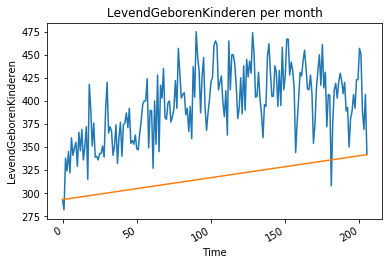

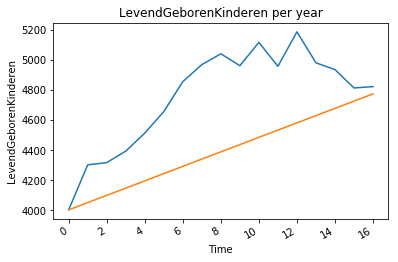

In [53]:
doAll(4)

Overledenen Average per year 1903
Overledenen Average per month 159
Overledenen the standerd deviation per year 83.70040493012641
Overledenen the standerd deviation per month 18.570207658130244
Overledenen Mediaan per year 1888.0
Overledenen Mediaan per month 157
Overledenen Mode per year 1855
Overledenen Mode per month 156


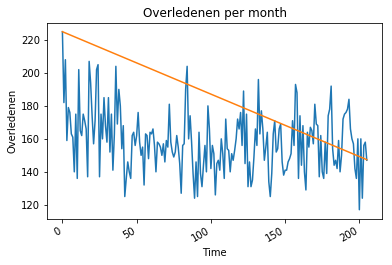

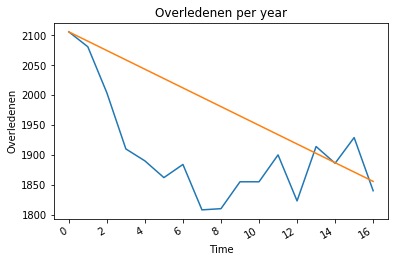

In [54]:
doAll(5)

VestigingVanuitEenAndereGemeente Average per year 19523
VestigingVanuitEenAndereGemeente Average per month 1627
VestigingVanuitEenAndereGemeente the standerd deviation per year 1801.6924646077148
VestigingVanuitEenAndereGemeente the standerd deviation per month 349.18623277857364
VestigingVanuitEenAndereGemeente Mediaan per year 19683.5
VestigingVanuitEenAndereGemeente Mediaan per month 1593
VestigingVanuitEenAndereGemeente Mode per year  The frequncie of all vlaues is either 1 or 0 so there is no mediaan
VestigingVanuitEenAndereGemeente Mode per month 1330


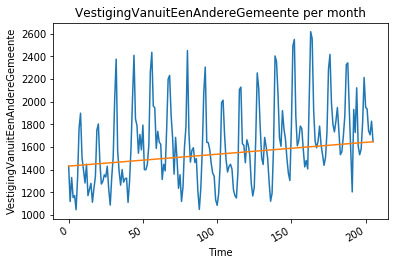

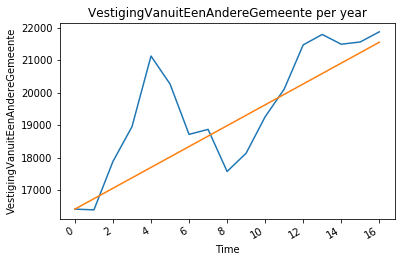

In [55]:
doAll(7)

Immigratie Average per year 4525
Immigratie Average per month 377
Immigratie the standerd deviation per year 1380.3651590497127
Immigratie the standerd deviation per month 296.64654150508625
Immigratie Mediaan per year 4575.0
Immigratie Mediaan per month 287
Immigratie Mode per year  The frequncie of all vlaues is either 1 or 0 so there is no mediaan
Immigratie Mode per month 168


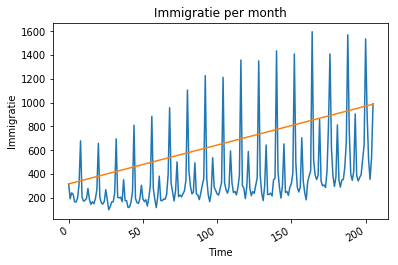

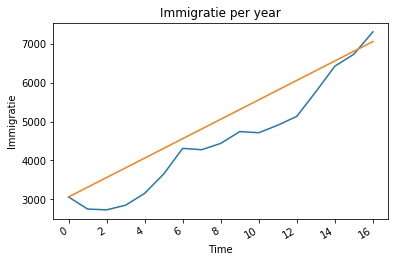

In [56]:
doAll(8)

TotaalVertrekInclAdmCorrecties Average per year 21563
TotaalVertrekInclAdmCorrecties Average per month 1797
TotaalVertrekInclAdmCorrecties the standerd deviation per year 3302.5895543809074
TotaalVertrekInclAdmCorrecties the standerd deviation per month 387.7587168310018
TotaalVertrekInclAdmCorrecties Mediaan per year 21064.5
TotaalVertrekInclAdmCorrecties Mediaan per month 1732
TotaalVertrekInclAdmCorrecties Mode per year  The frequncie of all vlaues is either 1 or 0 so there is no mediaan
TotaalVertrekInclAdmCorrecties Mode per month 1614


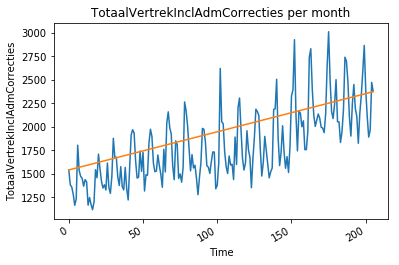

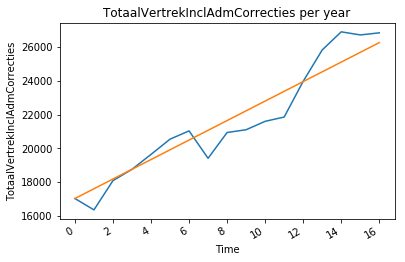

In [57]:
doAll(9)

VertrekNaarAndereGemeente_8 Average per year 17541
VertrekNaarAndereGemeente_8 Average per month 1462
VertrekNaarAndereGemeente_8 the standerd deviation per year 2656.200251966465
VertrekNaarAndereGemeente_8 the standerd deviation per month 294.26049018245044
VertrekNaarAndereGemeente_8 Mediaan per year 16787.0
VertrekNaarAndereGemeente_8 Mediaan per month 1394
VertrekNaarAndereGemeente_8 Mode per year  The frequncie of all vlaues is either 1 or 0 so there is no mediaan
VertrekNaarAndereGemeente_8 Mode per month 1239


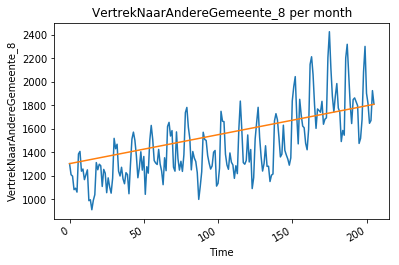

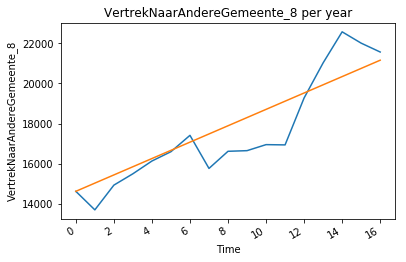

In [58]:
doAll(10)

EmigratieInclusiefAdmCorrectie Average per year 4022
EmigratieInclusiefAdmCorrectie Average per month 335
EmigratieInclusiefAdmCorrectie the standerd deviation per year 804.8785160541536
EmigratieInclusiefAdmCorrectie the standerd deviation per month 132.24301009207042
EmigratieInclusiefAdmCorrectie Mediaan per year 4324.5
EmigratieInclusiefAdmCorrectie Mediaan per month 315
EmigratieInclusiefAdmCorrectie Mode per year  The frequncie of all vlaues is either 1 or 0 so there is no mediaan
EmigratieInclusiefAdmCorrectie Mode per month 351


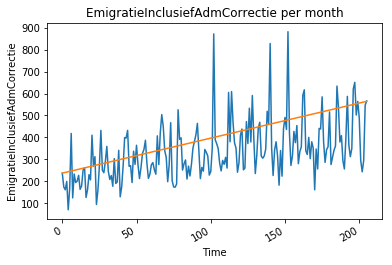

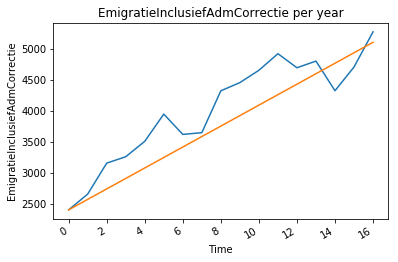

In [59]:
doAll(11)


Bevolkingsgroei Average per year 5422
Bevolkingsgroei Average per month 452
Bevolkingsgroei the standerd deviation per year 943.2997483435017
Bevolkingsgroei the standerd deviation per month 436.0818464330144
Bevolkingsgroei Mediaan per year 5233.0
Bevolkingsgroei Mediaan per month 361
Bevolkingsgroei Mode per year  The frequncie of all vlaues is either 1 or 0 so there is no mediaan
Bevolkingsgroei Mode per month 324


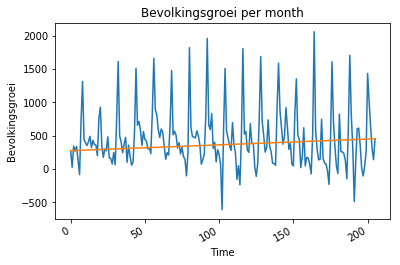

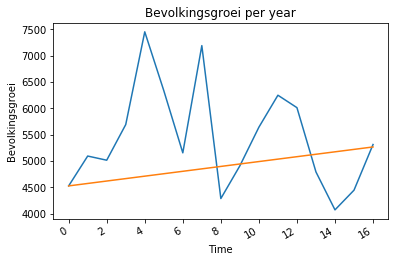

In [60]:
doAll(13)